In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from Player import Player
from RandomPlayer import RandomPlayer
from TabularQPlayer import TQPlayer
from MY_player import MY_player
from IPython.display import HTML, display
import tensorflow as tf

In [16]:

def print_board(board):
    display(HTML("""
    <style>
    .rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
      border: 1px  black solid !important;
      color: black !important;
    }
    </style>
    """ + board.html_str()))

In [22]:
def play_game(board: Board, player1: Player, player2: Player):
    player1.new_game(CROSS)
    player2.new_game(NAUGHT)
    board.reset()

    finished = False
    while not finished:
        result, finished = player1.move(board)
        print_board(board)
        if finished:
            if result == GameResult.DRAW:
                final_result = GameResult.DRAW
            else:
                final_result = GameResult.CROSS_WIN
        else:
            result, finished = player2.move(board)
            if finished:
                if result == GameResult.DRAW:
                    final_result = GameResult.DRAW
                else:
                    final_result = GameResult.NAUGHT_WIN
        print_board(board)

    
    player1.final_result(final_result)
    player2.final_result(final_result)
    #print_board(board)
    return final_result

In [18]:
def play_real_game(player1: Player, player2: Player):
    board = Board()
    player1.new_game(CROSS)
    player2.new_game(NAUGHT)
    board.reset()
    
    finished = False
    while not finished:
        result, finished = player1.move(board)
        print_board(board)
        if finished:
            if result == GameResult.DRAW:
                final_result = GameResult.DRAW
            else:
                final_result = GameResult.CROSS_WIN
        else:
            result, finished = player2.move(board)
            if finished:
                if result == GameResult.DRAW:
                    final_result = GameResult.DRAW
                else:
                    final_result = GameResult.NAUGHT_WIN

In [19]:
def battle(player1: Player, player2: Player, num_games: int = 100000, silent: bool = False):
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games):
        result = play_game(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    if not silent:
        print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                                  cross_count,
                                                                                                  naught_count))

        print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
            draw_count / num_games, cross_count / num_games, naught_count / num_games))

    return cross_count, naught_count, draw_count

In [20]:
def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, False)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
0


o,,
,x,
,,


[1 0 0 0 2 0 0 0 0]
7


o,,
,x,
,x,


[1 0 0 0 2 0 0 2 0]
1


o,o,
,x,
,x,


[1 1 0 0 2 0 0 2 0]
2


o,o,x
,x,
,x,


[1 1 2 0 2 0 0 2 0]
3


o,o,x
o,x,
,x,


[1 1 2 1 2 0 0 2 0]
8


o,o,x
o,x,
,x,x


[1 1 2 1 2 0 0 2 2]
5


o,o,x
o,x,o
,x,x


[1 1 2 1 2 1 0 2 2]
6


o,o,x
o,x,o
x,x,x


o,o,x
o,x,o
x,x,x


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
1


x,o,
,,
,,


[2 1 0 0 0 0 0 0 0]
6


x,o,
,,
x,,


[2 1 0 0 0 0 2 0 0]
2


x,o,o
,,
x,,


[2 1 1 0 0 0 2 0 0]
8


x,o,o
,,
x,,x


[2 1 1 0 0 0 2 0 2]
3


x,o,o
o,,
x,,x


[2 1 1 1 0 0 2 0 2]
5


x,o,o
o,,x
x,,x


[2 1 1 1 0 2 2 0 2]
4


x,o,o
o,o,x
x,,x


[2 1 1 1 1 2 2 0 2]
7


x,o,o
o,o,x
x,x,x


x,o,o
o,o,x
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
0


o,,x
,,
,,


[1 0 2 0 0 0 0 0 0]
7


o,,x
,,
,x,


[1 0 2 0 0 0 0 2 0]
1


o,o,x
,,
,x,


[1 1 2 0 0 0 0 2 0]
3


o,o,x
x,,
,x,


[1 1 2 2 0 0 0 2 0]
4


o,o,x
x,o,
,x,


[1 1 2 2 1 0 0 2 0]
5


o,o,x
x,o,x
,x,


[1 1 2 2 1 2 0 2 0]
6


o,o,x
x,o,x
o,x,


[1 1 2 2 1 2 1 2 0]
8


o,o,x
x,o,x
o,x,x


o,o,x
x,o,x
o,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
1


,o,x
,,
,,


[0 1 2 0 0 0 0 0 0]
3


,o,x
x,,
,,


[0 1 2 2 0 0 0 0 0]
0


o,o,x
x,,
,,


[1 1 2 2 0 0 0 0 0]
4


o,o,x
x,x,
,,


[1 1 2 2 2 0 0 0 0]
5


o,o,x
x,x,o
,,


[1 1 2 2 2 1 0 0 0]
6


o,o,x
x,x,o
x,,


o,o,x
x,x,o
x,,


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
3


,,x
o,,
,,


[0 0 2 1 0 0 0 0 0]
4


,,x
o,x,
,,


[0 0 2 1 2 0 0 0 0]
0


o,,x
o,x,
,,


[1 0 2 1 2 0 0 0 0]
1


o,x,x
o,x,
,,


[1 2 2 1 2 0 0 0 0]
5


o,x,x
o,x,o
,,


[1 2 2 1 2 1 0 0 0]
6


o,x,x
o,x,o
x,,


o,x,x
o,x,o
x,,


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
0


o,,
,,
,,x


[1 0 0 0 0 0 0 0 2]
3


o,,
x,,
,,x


[1 0 0 2 0 0 0 0 2]
1


o,o,
x,,
,,x


[1 1 0 2 0 0 0 0 2]
2


o,o,x
x,,
,,x


[1 1 2 2 0 0 0 0 2]
4


o,o,x
x,o,
,,x


[1 1 2 2 1 0 0 0 2]
5


o,o,x
x,o,x
,,x


o,o,x
x,o,x
,,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
3


o,,
x,,x
,,


[1 0 0 2 0 2 0 0 0]
1


o,o,
x,,x
,,


[1 1 0 2 0 2 0 0 0]
2


o,o,x
x,,x
,,


[1 1 2 2 0 2 0 0 0]
4


o,o,x
x,o,x
,,


[1 1 2 2 1 2 0 0 0]
7


o,o,x
x,o,x
,x,


[1 1 2 2 1 2 0 2 0]
8


o,o,x
x,o,x
,x,o


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
0


o,,
,,
,x,


[1 0 0 0 0 0 0 2 0]
2


o,,x
,,
,x,


[1 0 2 0 0 0 0 2 0]
3


o,,x
o,,
,x,


[1 0 2 1 0 0 0 2 0]
6


o,,x
o,,
x,x,


[1 0 2 1 0 0 2 2 0]
1


o,o,x
o,,
x,x,


[1 1 2 1 0 0 2 2 0]
8


o,o,x
o,,
x,x,x


o,o,x
o,,
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
6


o,,
,,x
x,,


[1 0 0 0 0 2 2 0 0]
1


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
8


o,o,
,,x
x,,x


[1 1 0 0 0 2 2 0 2]
2


o,o,o
,,x
x,,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
0


o,,
x,,
,,


[1 0 0 2 0 0 0 0 0]
2


o,,x
x,,
,,


[1 0 2 2 0 0 0 0 0]
1


o,o,x
x,,
,,


[1 1 2 2 0 0 0 0 0]
8


o,o,x
x,,
,,x


[1 1 2 2 0 0 0 0 2]
5


o,o,x
x,,o
,,x


[1 1 2 2 0 1 0 0 2]
4


o,o,x
x,x,o
,,x


[1 1 2 2 2 1 0 0 2]
6


o,o,x
x,x,o
o,,x


[1 1 2 2 2 1 1 0 2]
7


o,o,x
x,x,o
o,x,x


o,o,x
x,x,o
o,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
4


,,x
,o,
,,


[0 0 2 0 1 0 0 0 0]
8


,,x
,o,
,,x


[0 0 2 0 1 0 0 0 2]
0


o,,x
,o,
,,x


[1 0 2 0 1 0 0 0 2]
3


o,,x
x,o,
,,x


[1 0 2 2 1 0 0 0 2]
1


o,o,x
x,o,
,,x


[1 1 2 2 1 0 0 0 2]
6


o,o,x
x,o,
x,,x


[1 1 2 2 1 0 2 0 2]
5


o,o,x
x,o,o
x,,x


[1 1 2 2 1 1 2 0 2]
7


o,o,x
x,o,o
x,x,x


o,o,x
x,o,o
x,x,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
0


o,x,
,,
,,


[1 2 0 0 0 0 0 0 0]
7


o,x,
,,
,x,


[1 2 0 0 0 0 0 2 0]
2


o,x,o
,,
,x,


[1 2 1 0 0 0 0 2 0]
6


o,x,o
,,
x,x,


[1 2 1 0 0 0 2 2 0]
3


o,x,o
o,,
x,x,


[1 2 1 1 0 0 2 2 0]
8


o,x,o
o,,
x,x,x


o,x,o
o,,
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
6


o,,
,,x
x,,


[1 0 0 0 0 2 2 0 0]
1


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
8


o,o,
,,x
x,,x


[1 1 0 0 0 2 2 0 2]
2


o,o,o
,,x
x,,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
1


,o,
x,,
,,


[0 1 0 2 0 0 0 0 0]
7


,o,
x,,
,x,


[0 1 0 2 0 0 0 2 0]
0


o,o,
x,,
,x,


[1 1 0 2 0 0 0 2 0]
5


o,o,
x,,x
,x,


[1 1 0 2 0 2 0 2 0]
2


o,o,o
x,,x
,x,


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
1


,o,
,,
,x,


[0 1 0 0 0 0 0 2 0]
0


x,o,
,,
,x,


[2 1 0 0 0 0 0 2 0]
2


x,o,o
,,
,x,


[2 1 1 0 0 0 0 2 0]
5


x,o,o
,,x
,x,


[2 1 1 0 0 2 0 2 0]
3


x,o,o
o,,x
,x,


[2 1 1 1 0 2 0 2 0]
8


x,o,o
o,,x
,x,x


[2 1 1 1 0 2 0 2 2]
4


x,o,o
o,o,x
,x,x


[2 1 1 1 1 2 0 2 2]
6


x,o,o
o,o,x
x,x,x


x,o,o
o,o,x
x,x,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
8


o,,
,,
x,,x


[1 0 0 0 0 0 2 0 2]
1


o,o,
,,
x,,x


[1 1 0 0 0 0 2 0 2]
3


o,o,
x,,
x,,x


[1 1 0 2 0 0 2 0 2]
2


o,o,o
x,,
x,,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
2


,x,o
,,
,,


[0 2 1 0 0 0 0 0 0]
0


x,x,o
,,
,,


[2 2 1 0 0 0 0 0 0]
3


x,x,o
o,,
,,


[2 2 1 1 0 0 0 0 0]
6


x,x,o
o,,
x,,


[2 2 1 1 0 0 2 0 0]
4


x,x,o
o,o,
x,,


[2 2 1 1 1 0 2 0 0]
8


x,x,o
o,o,
x,,x


[2 2 1 1 1 0 2 0 2]
5


x,x,o
o,o,o
x,,x


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
2


,,o
,,
,x,


[0 0 1 0 0 0 0 2 0]
4


,,o
,x,
,x,


[0 0 1 0 2 0 0 2 0]
0


o,,o
,x,
,x,


[1 0 1 0 2 0 0 2 0]
3


o,,o
x,x,
,x,


[1 0 1 2 2 0 0 2 0]
1


o,o,o
x,x,
,x,


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
8


o,,
,,
x,,x


[1 0 0 0 0 0 2 0 2]
1


o,o,
,,
x,,x


[1 1 0 0 0 0 2 0 2]
4


o,o,
,x,
x,,x


[1 1 0 0 2 0 2 0 2]
2


o,o,o
,x,
x,,x


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
1


,o,
,,
,,x


[0 1 0 0 0 0 0 0 2]
6


,o,
,,
x,,x


[0 1 0 0 0 0 2 0 2]
0


o,o,
,,
x,,x


[1 1 0 0 0 0 2 0 2]
2


o,o,x
,,
x,,x


[1 1 2 0 0 0 2 0 2]
3


o,o,x
o,,
x,,x


[1 1 2 1 0 0 2 0 2]
7


o,o,x
o,,
x,x,x


o,o,x
o,,
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
5


,,x
,,o
,,


[0 0 2 0 0 1 0 0 0]
3


,,x
x,,o
,,


[0 0 2 2 0 1 0 0 0]
0


o,,x
x,,o
,,


[1 0 2 2 0 1 0 0 0]
7


o,,x
x,,o
,x,


[1 0 2 2 0 1 0 2 0]
1


o,o,x
x,,o
,x,


[1 1 2 2 0 1 0 2 0]
6


o,o,x
x,,o
x,x,


[1 1 2 2 0 1 2 2 0]
4


o,o,x
x,o,o
x,x,


[1 1 2 2 1 1 2 2 0]
8


o,o,x
x,o,o
x,x,x


o,o,x
x,o,o
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
6


o,,
,,x
x,,


[1 0 0 0 0 2 2 0 0]
1


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
7


o,o,
,,x
x,x,


[1 1 0 0 0 2 2 2 0]
2


o,o,o
,,x
x,x,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
2


x,,o
,,
,,


[2 0 1 0 0 0 0 0 0]
6


x,,o
,,
x,,


[2 0 1 0 0 0 2 0 0]
1


x,o,o
,,
x,,


[2 1 1 0 0 0 2 0 0]
5


x,o,o
,,x
x,,


[2 1 1 0 0 2 2 0 0]
3


x,o,o
o,,x
x,,


[2 1 1 1 0 2 2 0 0]
7


x,o,o
o,,x
x,x,


[2 1 1 1 0 2 2 2 0]
4


x,o,o
o,o,x
x,x,


[2 1 1 1 1 2 2 2 0]
8


x,o,o
o,o,x
x,x,x


x,o,o
o,o,x
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
1


o,x,
,,x
,,


[1 2 0 0 0 2 0 0 0]
2


o,x,o
,,x
,,


[1 2 1 0 0 2 0 0 0]
7


o,x,o
,,x
,x,


[1 2 1 0 0 2 0 2 0]
3


o,x,o
o,,x
,x,


[1 2 1 1 0 2 0 2 0]
4


o,x,o
o,x,x
,x,


o,x,o
o,x,x
,x,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
3


x,,
o,,
,,


[2 0 0 1 0 0 0 0 0]
7


x,,
o,,
,x,


[2 0 0 1 0 0 0 2 0]
1


x,o,
o,,
,x,


[2 1 0 1 0 0 0 2 0]
4


x,o,
o,x,
,x,


[2 1 0 1 2 0 0 2 0]
2


x,o,o
o,x,
,x,


[2 1 1 1 2 0 0 2 0]
6


x,o,o
o,x,
x,x,


[2 1 1 1 2 0 2 2 0]
5


x,o,o
o,x,o
x,x,


[2 1 1 1 2 1 2 2 0]
8


x,o,o
o,x,o
x,x,x


x,o,o
o,x,o
x,x,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
2


o,,x
,,
x,,


[1 0 2 0 0 0 2 0 0]
1


o,o,x
,,
x,,


[1 1 2 0 0 0 2 0 0]
5


o,o,x
,,x
x,,


[1 1 2 0 0 2 2 0 0]
3


o,o,x
o,,x
x,,


[1 1 2 1 0 2 2 0 0]
4


o,o,x
o,x,x
x,,


o,o,x
o,x,x
x,,


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
5


,,x
,,x
o,,


[0 0 2 0 0 2 1 0 0]
0


o,,x
,,x
o,,


[1 0 2 0 0 2 1 0 0]
1


o,x,x
,,x
o,,


[1 2 2 0 0 2 1 0 0]
3


o,x,x
o,,x
o,,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
4


x,,
,o,
,,


[2 0 0 0 1 0 0 0 0]
5


x,,
,o,x
,,


[2 0 0 0 1 2 0 0 0]
1


x,o,
,o,x
,,


[2 1 0 0 1 2 0 0 0]
2


x,o,x
,o,x
,,


[2 1 2 0 1 2 0 0 0]
3


x,o,x
o,o,x
,,


[2 1 2 1 1 2 0 0 0]
8


x,o,x
o,o,x
,,x


x,o,x
o,o,x
,,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
5


o,,
,,x
x,,


[1 0 0 0 0 2 2 0 0]
1


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
3


o,o,
x,,x
x,,


[1 1 0 2 0 2 2 0 0]
2


o,o,o
x,,x
x,,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
5


x,,
,,o
,,


[2 0 0 0 0 1 0 0 0]
4


x,,
,x,o
,,


[2 0 0 0 2 1 0 0 0]
1


x,o,
,x,o
,,


[2 1 0 0 2 1 0 0 0]
3


x,o,
x,x,o
,,


[2 1 0 2 2 1 0 0 0]
2


x,o,o
x,x,o
,,


[2 1 1 2 2 1 0 0 0]
6


x,o,o
x,x,o
x,,


x,o,o
x,x,o
x,,


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
0


o,,
,,x
,,


[1 0 0 0 0 2 0 0 0]
4


o,,
,x,x
,,


[1 0 0 0 2 2 0 0 0]
1


o,o,
,x,x
,,


[1 1 0 0 2 2 0 0 0]
3


o,o,
x,x,x
,,


o,o,
x,x,x
,,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
6


x,,
,,
o,,


[2 0 0 0 0 0 1 0 0]
7


x,,
,,
o,x,


[2 0 0 0 0 0 1 2 0]
1


x,o,
,,
o,x,


[2 1 0 0 0 0 1 2 0]
8


x,o,
,,
o,x,x


[2 1 0 0 0 0 1 2 2]
2


x,o,o
,,
o,x,x


[2 1 1 0 0 0 1 2 2]
5


x,o,o
,,x
o,x,x


[2 1 1 0 0 2 1 2 2]
3


x,o,o
o,,x
o,x,x


[2 1 1 1 0 2 1 2 2]
4


x,o,o
o,x,x
o,x,x


x,o,o
o,x,x
o,x,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
1


,o,
x,,
,,


[0 1 0 2 0 0 0 0 0]
4


,o,
x,x,
,,


[0 1 0 2 2 0 0 0 0]
0


o,o,
x,x,
,,


[1 1 0 2 2 0 0 0 0]
6


o,o,
x,x,
x,,


[1 1 0 2 2 0 2 0 0]
2


o,o,o
x,x,
x,,


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
7


o,,
,,
x,x,


[1 0 0 0 0 0 2 2 0]
1


o,o,
,,
x,x,


[1 1 0 0 0 0 2 2 0]
5


o,o,
,,x
x,x,


[1 1 0 0 0 2 2 2 0]
2


o,o,o
,,x
x,x,


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
0


o,,
,,
x,,


[1 0 0 0 0 0 2 0 0]
1


o,x,
,,
x,,


[1 2 0 0 0 0 2 0 0]
2


o,x,o
,,
x,,


[1 2 1 0 0 0 2 0 0]
4


o,x,o
,x,
x,,


[1 2 1 0 2 0 2 0 0]
3


o,x,o
o,x,
x,,


[1 2 1 1 2 0 2 0 0]
8


o,x,o
o,x,
x,,x


[1 2 1 1 2 0 2 0 2]
5


o,x,o
o,x,o
x,,x


[1 2 1 1 2 1 2 0 2]
7


o,x,o
o,x,o
x,x,x


o,x,o
o,x,o
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
1


,x,x
,,
o,,


[0 2 2 0 0 0 1 0 0]
0


o,x,x
,,
o,,


[1 2 2 0 0 0 1 0 0]
7


o,x,x
,,
o,x,


[1 2 2 0 0 0 1 2 0]
3


o,x,x
o,,
o,x,


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
2


,,o
,,
,x,


[0 0 1 0 0 0 0 2 0]
1


,x,o
,,
,x,


[0 2 1 0 0 0 0 2 0]
0


o,x,o
,,
,x,


[1 2 1 0 0 0 0 2 0]
5


o,x,o
,,x
,x,


[1 2 1 0 0 2 0 2 0]
4


o,x,o
,o,x
,x,


[1 2 1 0 1 2 0 2 0]
6


o,x,o
,o,x
x,x,


[1 2 1 0 1 2 2 2 0]
3


o,x,o
o,o,x
x,x,


[1 2 1 1 1 2 2 2 0]
8


o,x,o
o,o,x
x,x,x


o,x,o
o,o,x
x,x,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
2


,x,o
,,
,,


[0 2 1 0 0 0 0 0 0]
0


x,x,o
,,
,,


[2 2 1 0 0 0 0 0 0]
3


x,x,o
o,,
,,


[2 2 1 1 0 0 0 0 0]
8


x,x,o
o,,
,,x


[2 2 1 1 0 0 0 0 2]
4


x,x,o
o,o,
,,x


[2 2 1 1 1 0 0 0 2]
6


x,x,o
o,o,
x,,x


[2 2 1 1 1 0 2 0 2]
5


x,x,o
o,o,o
x,,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
2


,x,o
,,
,,


[0 2 1 0 0 0 0 0 0]
0


x,x,o
,,
,,


[2 2 1 0 0 0 0 0 0]
3


x,x,o
o,,
,,


[2 2 1 1 0 0 0 0 0]
8


x,x,o
o,,
,,x


[2 2 1 1 0 0 0 0 2]
4


x,x,o
o,o,
,,x


[2 2 1 1 1 0 0 0 2]
7


x,x,o
o,o,
,x,x


[2 2 1 1 1 0 0 2 2]
5


x,x,o
o,o,o
,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
1


,o,
,,x
,,


[0 1 0 0 0 2 0 0 0]
8


,o,
,,x
,,x


[0 1 0 0 0 2 0 0 2]
0


o,o,
,,x
,,x


[1 1 0 0 0 2 0 0 2]
6


o,o,
,,x
x,,x


[1 1 0 0 0 2 2 0 2]
2


o,o,o
,,x
x,,x


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
7


x,,
,,
,o,


[2 0 0 0 0 0 0 1 0]
6


x,,
,,
x,o,


[2 0 0 0 0 0 2 1 0]
1


x,o,
,,
x,o,


[2 1 0 0 0 0 2 1 0]
4


x,o,
,x,
x,o,


[2 1 0 0 2 0 2 1 0]
2


x,o,o
,x,
x,o,


[2 1 1 0 2 0 2 1 0]
8


x,o,o
,x,
x,o,x


x,o,o
,x,
x,o,x


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
3


,,
o,,
,x,


[0 0 0 1 0 0 0 2 0]
5


,,
o,,x
,x,


[0 0 0 1 0 2 0 2 0]
0


o,,
o,,x
,x,


[1 0 0 1 0 2 0 2 0]
8


o,,
o,,x
,x,x


[1 0 0 1 0 2 0 2 2]
1


o,o,
o,,x
,x,x


[1 1 0 1 0 2 0 2 2]
4


o,o,
o,x,x
,x,x


[1 1 0 1 2 2 0 2 2]
2


o,o,o
o,x,x
,x,x


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
1


,o,
,x,
,,


[0 1 0 0 2 0 0 0 0]
6


,o,
,x,
x,,


[0 1 0 0 2 0 2 0 0]
0


o,o,
,x,
x,,


[1 1 0 0 2 0 2 0 0]
7


o,o,
,x,
x,x,


[1 1 0 0 2 0 2 2 0]
2


o,o,o
,x,
x,x,


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
1


,o,
,x,
,,


[0 1 0 0 2 0 0 0 0]
0


x,o,
,x,
,,


[2 1 0 0 2 0 0 0 0]
2


x,o,o
,x,
,,


[2 1 1 0 2 0 0 0 0]
7


x,o,o
,x,
,x,


[2 1 1 0 2 0 0 2 0]
3


x,o,o
o,x,
,x,


[2 1 1 1 2 0 0 2 0]
6


x,o,o
o,x,
x,x,


[2 1 1 1 2 0 2 2 0]
8


x,o,o
o,x,
x,x,o


[2 1 1 1 2 0 2 2 1]
5


x,o,o
o,x,x
x,x,o


x,o,o
o,x,x
x,x,o


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
2


,,o
,x,
,,


[0 0 1 0 2 0 0 0 0]
5


,,o
,x,x
,,


[0 0 1 0 2 2 0 0 0]
0


o,,o
,x,x
,,


[1 0 1 0 2 2 0 0 0]
3


o,,o
x,x,x
,,


o,,o
x,x,x
,,


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
2


,x,o
,,
,,


[0 2 1 0 0 0 0 0 0]
0


x,x,o
,,
,,


[2 2 1 0 0 0 0 0 0]
3


x,x,o
o,,
,,


[2 2 1 1 0 0 0 0 0]
5


x,x,o
o,,x
,,


[2 2 1 1 0 2 0 0 0]
4


x,x,o
o,o,x
,,


[2 2 1 1 1 2 0 0 0]
8


x,x,o
o,o,x
,,x


[2 2 1 1 1 2 0 0 2]
6


x,x,o
o,o,x
o,,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
1


,o,
,,
x,,


[0 1 0 0 0 0 2 0 0]
4


,o,
,x,
x,,


[0 1 0 0 2 0 2 0 0]
0


o,o,
,x,
x,,


[1 1 0 0 2 0 2 0 0]
7


o,o,
,x,
x,x,


[1 1 0 0 2 0 2 2 0]
2


o,o,o
,x,
x,x,


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
3


,,
o,,
,x,


[0 0 0 1 0 0 0 2 0]
2


,,x
o,,
,x,


[0 0 2 1 0 0 0 2 0]
0


o,,x
o,,
,x,


[1 0 2 1 0 0 0 2 0]
8


o,,x
o,,
,x,x


[1 0 2 1 0 0 0 2 2]
1


o,o,x
o,,
,x,x


[1 1 2 1 0 0 0 2 2]
4


o,o,x
o,x,
,x,x


[1 1 2 1 2 0 0 2 2]
6


o,o,x
o,x,
o,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
1


,o,
,,x
,,


[0 1 0 0 0 2 0 0 0]
3


,o,
x,,x
,,


[0 1 0 2 0 2 0 0 0]
0


o,o,
x,,x
,,


[1 1 0 2 0 2 0 0 0]
7


o,o,
x,,x
,x,


[1 1 0 2 0 2 0 2 0]
2


o,o,o
x,,x
,x,


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
3


,,
o,x,
,,


[0 0 0 1 2 0 0 0 0]
6


,,
o,x,
x,,


[0 0 0 1 2 0 2 0 0]
0


o,,
o,x,
x,,


[1 0 0 1 2 0 2 0 0]
1


o,x,
o,x,
x,,


[1 2 0 1 2 0 2 0 0]
2


o,x,o
o,x,
x,,


[1 2 1 1 2 0 2 0 0]
7


o,x,o
o,x,
x,x,


o,x,o
o,x,
x,x,


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
2


,,o
,,
,,x


[0 0 1 0 0 0 0 0 2]
6


,,o
,,
x,,x


[0 0 1 0 0 0 2 0 2]
0


o,,o
,,
x,,x


[1 0 1 0 0 0 2 0 2]
5


o,,o
,,x
x,,x


[1 0 1 0 0 2 2 0 2]
1


o,o,o
,,x
x,,x


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
3


,,
o,,
,x,


[0 0 0 1 0 0 0 2 0]
4


,,
o,x,
,x,


[0 0 0 1 2 0 0 2 0]
0


o,,
o,x,
,x,


[1 0 0 1 2 0 0 2 0]
6


o,,
o,x,
x,x,


[1 0 0 1 2 0 2 2 0]
1


o,o,
o,x,
x,x,


[1 1 0 1 2 0 2 2 0]
8


o,o,
o,x,
x,x,x


o,o,
o,x,
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
5


,,x
,,x
o,,


[0 0 2 0 0 2 1 0 0]
0


o,,x
,,x
o,,


[1 0 2 0 0 2 1 0 0]
3


o,,x
x,,x
o,,


[1 0 2 2 0 2 1 0 0]
1


o,o,x
x,,x
o,,


[1 1 2 2 0 2 1 0 0]
8


o,o,x
x,,x
o,,x


o,o,x
x,,x
o,,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
7


,,x
,,
o,x,


[0 0 2 0 0 0 1 2 0]
0


o,,x
,,
o,x,


[1 0 2 0 0 0 1 2 0]
3


o,,x
x,,
o,x,


[1 0 2 2 0 0 1 2 0]
1


o,o,x
x,,
o,x,


[1 1 2 2 0 0 1 2 0]
5


o,o,x
x,,x
o,x,


[1 1 2 2 0 2 1 2 0]
4


o,o,x
x,o,x
o,x,


[1 1 2 2 1 2 1 2 0]
8


o,o,x
x,o,x
o,x,x


o,o,x
x,o,x
o,x,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
1


,o,
x,,
,,


[0 1 0 2 0 0 0 0 0]
8


,o,
x,,
,,x


[0 1 0 2 0 0 0 0 2]
0


o,o,
x,,
,,x


[1 1 0 2 0 0 0 0 2]
2


o,o,x
x,,
,,x


[1 1 2 2 0 0 0 0 2]
6


o,o,x
x,,
o,,x


[1 1 2 2 0 0 1 0 2]
4


o,o,x
x,x,
o,,x


[1 1 2 2 2 0 1 0 2]
5


o,o,x
x,x,o
o,,x


[1 1 2 2 2 1 1 0 2]
7


o,o,x
x,x,o
o,x,x


o,o,x
x,x,o
o,x,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
2


,,o
x,,
,,


[0 0 1 2 0 0 0 0 0]
8


,,o
x,,
,,x


[0 0 1 2 0 0 0 0 2]
0


o,,o
x,,
,,x


[1 0 1 2 0 0 0 0 2]
1


o,x,o
x,,
,,x


[1 2 1 2 0 0 0 0 2]
4


o,x,o
x,o,
,,x


[1 2 1 2 1 0 0 0 2]
7


o,x,o
x,o,
,x,x


[1 2 1 2 1 0 0 2 2]
5


o,x,o
x,o,o
,x,x


[1 2 1 2 1 1 0 2 2]
6


o,x,o
x,o,o
x,x,x


o,x,o
x,o,o
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
1


,o,
,,x
,,


[0 1 0 0 0 2 0 0 0]
0


x,o,
,,x
,,


[2 1 0 0 0 2 0 0 0]
2


x,o,o
,,x
,,


[2 1 1 0 0 2 0 0 0]
3


x,o,o
x,,x
,,


[2 1 1 2 0 2 0 0 0]
4


x,o,o
x,o,x
,,


[2 1 1 2 1 2 0 0 0]
7


x,o,o
x,o,x
,x,


[2 1 1 2 1 2 0 2 0]
6


x,o,o
x,o,x
o,x,


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
8


x,,
,,
,,o


[2 0 0 0 0 0 0 0 1]
4


x,,
,x,
,,o


[2 0 0 0 2 0 0 0 1]
1


x,o,
,x,
,,o


[2 1 0 0 2 0 0 0 1]
2


x,o,x
,x,
,,o


[2 1 2 0 2 0 0 0 1]
3


x,o,x
o,x,
,,o


[2 1 2 1 2 0 0 0 1]
6


x,o,x
o,x,
x,,o


x,o,x
o,x,
x,,o


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
7


,,x
,,
,o,


[0 0 2 0 0 0 0 1 0]
4


,,x
,x,
,o,


[0 0 2 0 2 0 0 1 0]
0


o,,x
,x,
,o,


[1 0 2 0 2 0 0 1 0]
3


o,,x
x,x,
,o,


[1 0 2 2 2 0 0 1 0]
1


o,o,x
x,x,
,o,


[1 1 2 2 2 0 0 1 0]
8


o,o,x
x,x,
,o,x


[1 1 2 2 2 0 0 1 2]
5


o,o,x
x,x,o
,o,x


[1 1 2 2 2 1 0 1 2]
6


o,o,x
x,x,o
x,o,x


o,o,x
x,x,o
x,o,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
1


,o,
,,
x,,


[0 1 0 0 0 0 2 0 0]
3


,o,
x,,
x,,


[0 1 0 2 0 0 2 0 0]
0


o,o,
x,,
x,,


[1 1 0 2 0 0 2 0 0]
7


o,o,
x,,
x,x,


[1 1 0 2 0 0 2 2 0]
2


o,o,o
x,,
x,x,


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
8


,,x
,,
,,o


[0 0 2 0 0 0 0 0 1]
5


,,x
,,x
,,o


[0 0 2 0 0 2 0 0 1]
0


o,,x
,,x
,,o


[1 0 2 0 0 2 0 0 1]
3


o,,x
x,,x
,,o


[1 0 2 2 0 2 0 0 1]
1


o,o,x
x,,x
,,o


[1 1 2 2 0 2 0 0 1]
7


o,o,x
x,,x
,x,o


[1 1 2 2 0 2 0 2 1]
4


o,o,x
x,o,x
,x,o


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
1


,o,
,,
x,,


[0 1 0 0 0 0 2 0 0]
5


,o,
,,x
x,,


[0 1 0 0 0 2 2 0 0]
0


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
8


o,o,
,,x
x,,x


[1 1 0 0 0 2 2 0 2]
2


o,o,o
,,x
x,,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
1


,o,
,,x
,,


[0 1 0 0 0 2 0 0 0]
6


,o,
,,x
x,,


[0 1 0 0 0 2 2 0 0]
0


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
2


o,o,x
,,x
x,,


[1 1 2 0 0 2 2 0 0]
4


o,o,x
,o,x
x,,


[1 1 2 0 1 2 2 0 0]
8


o,o,x
,o,x
x,,x


o,o,x
,o,x
x,,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
2


,,o
,,x
,,


[0 0 1 0 0 2 0 0 0]
1


,x,o
,,x
,,


[0 2 1 0 0 2 0 0 0]
0


o,x,o
,,x
,,


[1 2 1 0 0 2 0 0 0]
3


o,x,o
x,,x
,,


[1 2 1 2 0 2 0 0 0]
4


o,x,o
x,o,x
,,


[1 2 1 2 1 2 0 0 0]
6


o,x,o
x,o,x
x,,


[1 2 1 2 1 2 2 0 0]
7


o,x,o
x,o,x
x,o,


[1 2 1 2 1 2 2 1 0]
8


o,x,o
x,o,x
x,o,x


o,x,o
x,o,x
x,o,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
2


,x,o
,,
,,


[0 2 1 0 0 0 0 0 0]
0


x,x,o
,,
,,


[2 2 1 0 0 0 0 0 0]
3


x,x,o
o,,
,,


[2 2 1 1 0 0 0 0 0]
6


x,x,o
o,,
x,,


[2 2 1 1 0 0 2 0 0]
4


x,x,o
o,o,
x,,


[2 2 1 1 1 0 2 0 0]
5


x,x,o
o,o,x
x,,


[2 2 1 1 1 2 2 0 0]
7


x,x,o
o,o,x
x,o,


[2 2 1 1 1 2 2 1 0]
8


x,x,o
o,o,x
x,o,x


x,x,o
o,o,x
x,o,x


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
1


,o,
,,
x,,


[0 1 0 0 0 0 2 0 0]
8


,o,
,,
x,,x


[0 1 0 0 0 0 2 0 2]
2


,o,o
,,
x,,x


[0 1 1 0 0 0 2 0 2]
4


,o,o
,x,
x,,x


[0 1 1 0 2 0 2 0 2]
0


o,o,o
,x,
x,,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
4


,,
x,o,
,,


[0 0 0 2 1 0 0 0 0]
6


,,
x,o,
x,,


[0 0 0 2 1 0 2 0 0]
0


o,,
x,o,
x,,


[1 0 0 2 1 0 2 0 0]
5


o,,
x,o,x
x,,


[1 0 0 2 1 2 2 0 0]
1


o,o,
x,o,x
x,,


[1 1 0 2 1 2 2 0 0]
8


o,o,
x,o,x
x,,x


[1 1 0 2 1 2 2 0 2]
2


o,o,o
x,o,x
x,,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
3


,x,
o,,
,,


[0 2 0 1 0 0 0 0 0]
7


,x,
o,,
,x,


[0 2 0 1 0 0 0 2 0]
0


o,x,
o,,
,x,


[1 2 0 1 0 0 0 2 0]
4


o,x,
o,x,
,x,


o,x,
o,x,
,x,


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
3


,,
o,,x
,,


[0 0 0 1 0 2 0 0 0]
6


,,
o,,x
x,,


[0 0 0 1 0 2 2 0 0]
0


o,,
o,,x
x,,


[1 0 0 1 0 2 2 0 0]
4


o,,
o,x,x
x,,


[1 0 0 1 2 2 2 0 0]
1


o,o,
o,x,x
x,,


[1 1 0 1 2 2 2 0 0]
8


o,o,
o,x,x
x,,x


[1 1 0 1 2 2 2 0 2]
2


o,o,o
o,x,x
x,,x


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
2


,,o
,,
,,x


[0 0 1 0 0 0 0 0 2]
5


,,o
,,x
,,x


[0 0 1 0 0 2 0 0 2]
0


o,,o
,,x
,,x


[1 0 1 0 0 2 0 0 2]
4


o,,o
,x,x
,,x


[1 0 1 0 2 2 0 0 2]
1


o,o,o
,x,x
,,x


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
2


,,o
,,
,,x


[0 0 1 0 0 0 0 0 2]
3


,,o
x,,
,,x


[0 0 1 2 0 0 0 0 2]
1


,o,o
x,,
,,x


[0 1 1 2 0 0 0 0 2]
4


,o,o
x,x,
,,x


[0 1 1 2 2 0 0 0 2]
0


o,o,o
x,x,
,,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
8


,,x
,,
,,o


[0 0 2 0 0 0 0 0 1]
1


,x,x
,,
,,o


[0 2 2 0 0 0 0 0 1]
0


o,x,x
,,
,,o


[1 2 2 0 0 0 0 0 1]
6


o,x,x
,,
x,,o


[1 2 2 0 0 0 2 0 1]
3


o,x,x
o,,
x,,o


[1 2 2 1 0 0 2 0 1]
4


o,x,x
o,x,
x,,o


o,x,x
o,x,
x,,o


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
3


,,
o,,x
,,


[0 0 0 1 0 2 0 0 0]
8


,,
o,,x
,,x


[0 0 0 1 0 2 0 0 2]
0


o,,
o,,x
,,x


[1 0 0 1 0 2 0 0 2]
1


o,x,
o,,x
,,x


[1 2 0 1 0 2 0 0 2]
2


o,x,o
o,,x
,,x


[1 2 1 1 0 2 0 0 2]
7


o,x,o
o,,x
,x,x


[1 2 1 1 0 2 0 2 2]
4


o,x,o
o,o,x
,x,x


[1 2 1 1 1 2 0 2 2]
6


o,x,o
o,o,x
x,x,x


o,x,o
o,o,x
x,x,x


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
4


,,
,o,x
,,


[0 0 0 0 1 2 0 0 0]
0


x,,
,o,x
,,


[2 0 0 0 1 2 0 0 0]
2


x,,o
,o,x
,,


[2 0 1 0 1 2 0 0 0]
7


x,,o
,o,x
,x,


[2 0 1 0 1 2 0 2 0]
1


x,o,o
,o,x
,x,


[2 1 1 0 1 2 0 2 0]
3


x,o,o
x,o,x
,x,


[2 1 1 2 1 2 0 2 0]
6


x,o,o
x,o,x
o,x,


[0 0 0 0 0 0 0 0 0]
5


,,
,,x
,,


[0 0 0 0 0 2 0 0 0]
4


,,
,o,x
,,


[0 0 0 0 1 2 0 0 0]
7


,,
,o,x
,x,


[0 0 0 0 1 2 0 2 0]
0


o,,
,o,x
,x,


[1 0 0 0 1 2 0 2 0]
3


o,,
x,o,x
,x,


[1 0 0 2 1 2 0 2 0]
1


o,o,
x,o,x
,x,


[1 1 0 2 1 2 0 2 0]
8


o,o,
x,o,x
,x,x


[1 1 0 2 1 2 0 2 2]
2


o,o,o
x,o,x
,x,x


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
4


,,
,o,
,x,


[0 0 0 0 1 0 0 2 0]
0


x,,
,o,
,x,


[2 0 0 0 1 0 0 2 0]
1


x,o,
,o,
,x,


[2 1 0 0 1 0 0 2 0]
3


x,o,
x,o,
,x,


[2 1 0 2 1 0 0 2 0]
2


x,o,o
x,o,
,x,


[2 1 1 2 1 0 0 2 0]
8


x,o,o
x,o,
,x,x


[2 1 1 2 1 0 0 2 2]
5


x,o,o
x,o,o
,x,x


[2 1 1 2 1 1 0 2 2]
6


x,o,o
x,o,o
x,x,x


x,o,o
x,o,o
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
8


,,x
,,
,,o


[0 0 2 0 0 0 0 0 1]
6


,,x
,,
x,,o


[0 0 2 0 0 0 2 0 1]
0


o,,x
,,
x,,o


[1 0 2 0 0 0 2 0 1]
5


o,,x
,,x
x,,o


[1 0 2 0 0 2 2 0 1]
1


o,o,x
,,x
x,,o


[1 1 2 0 0 2 2 0 1]
3


o,o,x
x,,x
x,,o


[1 1 2 2 0 2 2 0 1]
4


o,o,x
x,o,x
x,,o


[0 0 0 0 0 0 0 0 0]
6


,,
,,
x,,


[0 0 0 0 0 0 2 0 0]
1


,o,
,,
x,,


[0 1 0 0 0 0 2 0 0]
5


,o,
,,x
x,,


[0 1 0 0 0 2 2 0 0]
0


o,o,
,,x
x,,


[1 1 0 0 0 2 2 0 0]
4


o,o,
,x,x
x,,


[1 1 0 0 2 2 2 0 0]
2


o,o,o
,x,x
x,,


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
4


,,
x,o,
,,


[0 0 0 2 1 0 0 0 0]
8


,,
x,o,
,,x


[0 0 0 2 1 0 0 0 2]
0


o,,
x,o,
,,x


[1 0 0 2 1 0 0 0 2]
2


o,,x
x,o,
,,x


[1 0 2 2 1 0 0 0 2]
5


o,,x
x,o,o
,,x


[1 0 2 2 1 1 0 0 2]
1


o,x,x
x,o,o
,,x


[1 2 2 2 1 1 0 0 2]
6


o,x,x
x,o,o
o,,x


[1 2 2 2 1 1 1 0 2]
7


o,x,x
x,o,o
o,x,x


o,x,x
x,o,o
o,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
8


,,x
,,
,,o


[0 0 2 0 0 0 0 0 1]
4


,,x
,x,
,,o


[0 0 2 0 2 0 0 0 1]
0


o,,x
,x,
,,o


[1 0 2 0 2 0 0 0 1]
6


o,,x
,x,
x,,o


o,,x
,x,
x,,o


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
4


,x,
,o,
,,


[0 2 0 0 1 0 0 0 0]
3


,x,
x,o,
,,


[0 2 0 2 1 0 0 0 0]
0


o,x,
x,o,
,,


[1 2 0 2 1 0 0 0 0]
6


o,x,
x,o,
x,,


[1 2 0 2 1 0 2 0 0]
2


o,x,o
x,o,
x,,


[1 2 1 2 1 0 2 0 0]
8


o,x,o
x,o,
x,,x


[1 2 1 2 1 0 2 0 2]
5


o,x,o
x,o,o
x,,x


[1 2 1 2 1 1 2 0 2]
7


o,x,o
x,o,o
x,x,x


o,x,o
x,o,o
x,x,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
8


,,x
,,
,,o


[0 0 2 0 0 0 0 0 1]
6


,,x
,,
x,,o


[0 0 2 0 0 0 2 0 1]
0


o,,x
,,
x,,o


[1 0 2 0 0 0 2 0 1]
7


o,,x
,,
x,x,o


[1 0 2 0 0 0 2 2 1]
1


o,o,x
,,
x,x,o


[1 1 2 0 0 0 2 2 1]
5


o,o,x
,,x
x,x,o


[1 1 2 0 0 2 2 2 1]
3


o,o,x
o,,x
x,x,o


[1 1 2 1 0 2 2 2 1]
4


o,o,x
o,x,x
x,x,o


o,o,x
o,x,x
x,x,o


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
5


,,
x,,o
,,


[0 0 0 2 0 1 0 0 0]
1


,x,
x,,o
,,


[0 2 0 2 0 1 0 0 0]
0


o,x,
x,,o
,,


[1 2 0 2 0 1 0 0 0]
7


o,x,
x,,o
,x,


[1 2 0 2 0 1 0 2 0]
2


o,x,o
x,,o
,x,


[1 2 1 2 0 1 0 2 0]
4


o,x,o
x,x,o
,x,


o,x,o
x,x,o
,x,


[0 0 0 0 0 0 0 0 0]
7


,,
,,
,x,


[0 0 0 0 0 0 0 2 0]
5


,,
,,o
,x,


[0 0 0 0 0 1 0 2 0]
6


,,
,,o
x,x,


[0 0 0 0 0 1 2 2 0]
0


o,,
,,o
x,x,


[1 0 0 0 0 1 2 2 0]
1


o,x,
,,o
x,x,


[1 2 0 0 0 1 2 2 0]
2


o,x,o
,,o
x,x,


[1 2 1 0 0 1 2 2 0]
8


o,x,o
,,o
x,x,x


o,x,o
,,o
x,x,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
6


,,
x,,
o,,


[0 0 0 2 0 0 1 0 0]
2


,,x
x,,
o,,


[0 0 2 2 0 0 1 0 0]
0


o,,x
x,,
o,,


[1 0 2 2 0 0 1 0 0]
1


o,x,x
x,,
o,,


[1 2 2 2 0 0 1 0 0]
4


o,x,x
x,o,
o,,


[1 2 2 2 1 0 1 0 0]
7


o,x,x
x,o,
o,x,


[1 2 2 2 1 0 1 2 0]
5


o,x,x
x,o,o
o,x,


[1 2 2 2 1 1 1 2 0]
8


o,x,x
x,o,o
o,x,x


o,x,x
x,o,o
o,x,x


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
5


,,
,x,o
,,


[0 0 0 0 2 1 0 0 0]
7


,,
,x,o
,x,


[0 0 0 0 2 1 0 2 0]
0


o,,
,x,o
,x,


[1 0 0 0 2 1 0 2 0]
3


o,,
x,x,o
,x,


[1 0 0 2 2 1 0 2 0]
1


o,o,
x,x,o
,x,


[1 1 0 2 2 1 0 2 0]
2


o,o,x
x,x,o
,x,


[1 1 2 2 2 1 0 2 0]
6


o,o,x
x,x,o
o,x,


[1 1 2 2 2 1 1 2 0]
8


o,o,x
x,x,o
o,x,x


o,o,x
x,x,o
o,x,x


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
1


x,o,
,,
,,


[2 1 0 0 0 0 0 0 0]
8


x,o,
,,
,,x


[2 1 0 0 0 0 0 0 2]
2


x,o,o
,,
,,x


[2 1 1 0 0 0 0 0 2]
7


x,o,o
,,
,x,x


[2 1 1 0 0 0 0 2 2]
3


x,o,o
o,,
,x,x


[2 1 1 1 0 0 0 2 2]
4


x,o,o
o,x,
,x,x


x,o,o
o,x,
,x,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
7


,,
x,,
,o,


[0 0 0 2 0 0 0 1 0]
4


,,
x,x,
,o,


[0 0 0 2 2 0 0 1 0]
0


o,,
x,x,
,o,


[1 0 0 2 2 0 0 1 0]
1


o,x,
x,x,
,o,


[1 2 0 2 2 0 0 1 0]
2


o,x,o
x,x,
,o,


[1 2 1 2 2 0 0 1 0]
6


o,x,o
x,x,
x,o,


[1 2 1 2 2 0 2 1 0]
5


o,x,o
x,x,o
x,o,


[1 2 1 2 2 1 2 1 0]
8


o,x,o
x,x,o
x,o,x


o,x,o
x,x,o
x,o,x


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
6


,,
,x,
o,,


[0 0 0 0 2 0 1 0 0]
5


,,
,x,x
o,,


[0 0 0 0 2 2 1 0 0]
0


o,,
,x,x
o,,


[1 0 0 0 2 2 1 0 0]
3


o,,
x,x,x
o,,


o,,
x,x,x
o,,


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
2


,,o
,,
,,x


[0 0 1 0 0 0 0 0 2]
4


,,o
,x,
,,x


[0 0 1 0 2 0 0 0 2]
0


o,,o
,x,
,,x


[1 0 1 0 2 0 0 0 2]
6


o,,o
,x,
x,,x


[1 0 1 0 2 0 2 0 2]
1


o,o,o
,x,
x,,x


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
2


,,o
,,
,,x


[0 0 1 0 0 0 0 0 2]
0


x,,o
,,
,,x


[2 0 1 0 0 0 0 0 2]
1


x,o,o
,,
,,x


[2 1 1 0 0 0 0 0 2]
3


x,o,o
x,,
,,x


[2 1 1 2 0 0 0 0 2]
4


x,o,o
x,o,
,,x


[2 1 1 2 1 0 0 0 2]
6


x,o,o
x,o,
x,,x


x,o,o
x,o,
x,,x


[0 0 0 0 0 0 0 0 0]
0


x,,
,,
,,


[2 0 0 0 0 0 0 0 0]
2


x,,o
,,
,,


[2 0 1 0 0 0 0 0 0]
4


x,,o
,x,
,,


[2 0 1 0 2 0 0 0 0]
1


x,o,o
,x,
,,


[2 1 1 0 2 0 0 0 0]
5


x,o,o
,x,x
,,


[2 1 1 0 2 2 0 0 0]
3


x,o,o
o,x,x
,,


[2 1 1 1 2 2 0 0 0]
6


x,o,o
o,x,x
x,,


[2 1 1 1 2 2 2 0 0]
7


x,o,o
o,x,x
x,o,


[2 1 1 1 2 2 2 1 0]
8


x,o,o
o,x,x
x,o,x


x,o,o
o,x,x
x,o,x


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
1


,x,x
,,
o,,


[0 2 2 0 0 0 1 0 0]
0


o,x,x
,,
o,,


[1 2 2 0 0 0 1 0 0]
5


o,x,x
,,x
o,,


[1 2 2 0 0 2 1 0 0]
3


o,x,x
o,,x
o,,


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
8


,,
x,,
,,o


[0 0 0 2 0 0 0 0 1]
5


,,
x,,x
,,o


[0 0 0 2 0 2 0 0 1]
0


o,,
x,,x
,,o


[1 0 0 2 0 2 0 0 1]
1


o,x,
x,,x
,,o


[1 2 0 2 0 2 0 0 1]
2


o,x,o
x,,x
,,o


[1 2 1 2 0 2 0 0 1]
4


o,x,o
x,x,x
,,o


o,x,o
x,x,x
,,o


[0 0 0 0 0 0 0 0 0]
2


,,x
,,
,,


[0 0 2 0 0 0 0 0 0]
6


,,x
,,
o,,


[0 0 2 0 0 0 1 0 0]
8


,,x
,,
o,,x


[0 0 2 0 0 0 1 0 2]
0


o,,x
,,
o,,x


[1 0 2 0 0 0 1 0 2]
3


o,,x
x,,
o,,x


[1 0 2 2 0 0 1 0 2]
1


o,o,x
x,,
o,,x


[1 1 2 2 0 0 1 0 2]
5


o,o,x
x,,x
o,,x


o,o,x
x,,x
o,,x


[0 0 0 0 0 0 0 0 0]
3


,,
x,,
,,


[0 0 0 2 0 0 0 0 0]
1


,o,
x,,
,,


[0 1 0 2 0 0 0 0 0]
4


,o,
x,x,
,,


[0 1 0 2 2 0 0 0 0]
0


o,o,
x,x,
,,


[1 1 0 2 2 0 0 0 0]
7


o,o,
x,x,
,x,


[1 1 0 2 2 0 0 2 0]
2


o,o,o
x,x,
,x,


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
3


,,
o,,
,,x


[0 0 0 1 0 0 0 0 2]
0


x,,
o,,
,,x


[2 0 0 1 0 0 0 0 2]
1


x,o,
o,,
,,x


[2 1 0 1 0 0 0 0 2]
6


x,o,
o,,
x,,x


[2 1 0 1 0 0 2 0 2]
2


x,o,o
o,,
x,,x


[2 1 1 1 0 0 2 0 2]
7


x,o,o
o,,
x,x,x


x,o,o
o,,
x,x,x


[0 0 0 0 0 0 0 0 0]
8


,,
,,
,,x


[0 0 0 0 0 0 0 0 2]
4


,,
,o,
,,x


[0 0 0 0 1 0 0 0 2]
1


,x,
,o,
,,x


[0 2 0 0 1 0 0 0 2]
0


o,x,
,o,
,,x


[1 2 0 0 1 0 0 0 2]
7


o,x,
,o,
,x,x


[1 2 0 0 1 0 0 2 2]
2


o,x,o
,o,
,x,x


[1 2 1 0 1 0 0 2 2]
3


o,x,o
x,o,
,x,x


[1 2 1 2 1 0 0 2 2]
6


o,x,o
x,o,
o,x,x


[0 0 0 0 0 0 0 0 0]
1


,x,
,,
,,


[0 2 0 0 0 0 0 0 0]
5


,x,
,,o
,,


[0 2 0 0 0 1 0 0 0]
8


,x,
,,o
,,x


[0 2 0 0 0 1 0 0 2]
0


o,x,
,,o
,,x


[1 2 0 0 0 1 0 0 2]
4


o,x,
,x,o
,,x


[1 2 0 0 2 1 0 0 2]
2


o,x,o
,x,o
,,x


[1 2 1 0 2 1 0 0 2]
6


o,x,o
,x,o
x,,x


[1 2 1 0 2 1 2 0 2]
3


o,x,o
o,x,o
x,,x


[1 2 1 1 2 1 2 0 2]
7


o,x,o
o,x,o
x,x,x


o,x,o
o,x,o
x,x,x


[0 0 0 0 0 0 0 0 0]
4


,,
,x,
,,


[0 0 0 0 2 0 0 0 0]
7


,,
,x,
,o,


[0 0 0 0 2 0 0 1 0]
8


,,
,x,
,o,x


[0 0 0 0 2 0 0 1 2]
0


o,,
,x,
,o,x


[1 0 0 0 2 0 0 1 2]
3


o,,
x,x,
,o,x


[1 0 0 2 2 0 0 1 2]
1


o,o,
x,x,
,o,x


[1 1 0 2 2 0 0 1 2]
6


o,o,
x,x,
x,o,x


[1 1 0 2 2 0 2 1 2]
2


o,o,o
x,x,
x,o,x


After 100 game we have draws: 9, Player 1 wins: 49, and Player 2 wins: 42.
Which gives percentages of draws: 9.00%, Player 1 wins: 49.00%, and Player 2 wins:  42.00%


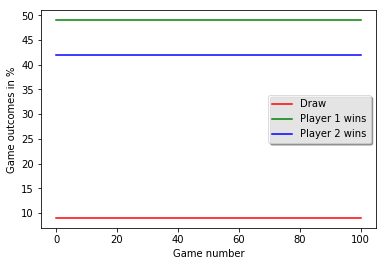

In [23]:
player1 = RandomPlayer()
player2 = TQPlayer()

eval_players(player1, player2, 1)
#board = Board()
#player1 = MY_player()
#play_game(board,player1,player2)

#print_board(board)

#if result == GameResult.CROSS_WIN:
 #   print("Cross won")
#elif result == GameResult.NAUGHT_WIN:
 #   print("Naught won")
#else:
 #   print("Draw")